In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import math
from math import cos, sin, tanh
from helper import get_trial_list
from scipy.signal import savgol_filter
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Getting started (this part can be ignored)

In [ ]:
# Drawing a single trajectory 
# --- Insert ---
pp_id = '02'
trial = '10'
# --------------

path_Human = './newdata/id_' + pp_id + '/Human'
path_Spot = './newdata/id_' + pp_id + '/Spot'

df_Human = pd.read_csv(path_Human + "/" + pp_id + "_"+ trial + ".txt", sep=" ", header=None, 
                 names=["timestamp", "x", "z"])
df_Spot = pd.read_csv(path_Spot +  "/" + pp_id + "_"+ trial + ".txt", sep=" ", header=None, 
                 names=["timestamp", "x", "z"])

df_Human['timestamp'] = pd.to_datetime(df_Human['timestamp'], format = '%H:%M:%S:%f')
df_Spot['timestamp'] = pd.to_datetime(df_Spot['timestamp'], format = '%H:%M:%S:%f')

# display DataFrame
print(df_Human)
print(df_Spot)

df_Human.plot.scatter(x = 'x', y = 'z', c = 'timestamp', s = 10);
df_Spot.plot.scatter(x = 'x', y = 'z', c = 'timestamp', s = 10);

In [ ]:
## Separate dominant and submissive, then put it in a dataframe

#--- Insert here ---
pp_id = '01'
position_of = 'Spot'
scenario = 'fronting' # fronting or crossing
apparance = 'dom' # 'dom' or 'sub' 
#-------------------

trial_list = get_trial_list(scenario, apparance)
df_list = []

# load data files, put it in a list
for i in range(8): # change later to the length of the list
    filepath = './newdata/id_' + pp_id + '/' + position_of + '/' + pp_id + '_' + str(trial_list[int(pp_id)][i]) + '.txt'
    df = pd.read_csv(filepath, sep=" ", header=None, names=["timestamp", "x", "z"])
    df['timestamp'] = pd.to_datetime(df['timestamp'], format = '%H:%M:%S:%f')
    df_list.append(df)

# Concatenate the df in the list horizontally
df = pd.concat(df_list, axis=1, ignore_index=False)

df
# Draw four lines in one plot 
#(Probably need to normalize the time to draw multiple trajectories in one plot)

# Distance between Spot and Human

## Raw distance plots

In [10]:
# Calculate distance between the objects over time (fronting scenario)

def get_df_distance(pp_ids, apparance):
    
    df_plot= None

    for pp_id in pp_ids:
        path_Human = './newdata/id_' + pp_id + '/Human'
        path_Spot = './newdata/id_' + pp_id + '/Spot'

        trials = get_trial_list('fronting', apparance)

        for i in trials[int(pp_id)-1]:
            df_Human = pd.read_csv(path_Human + "/" + pp_id + "_"+ str(i) + ".txt", sep=" ", header=None, 
                             names=["ts", "x_human", "z_human"])
            df_Spot = pd.read_csv(path_Spot +  "/" + pp_id + "_"+ str(i) + ".txt", sep=" ", header=None, 
                             names=["ts", "x_spot", "z_spot"])

            # Check if the length of the dataframe matchs
            if not df_Human.size == df_Spot.size: 
                # print("Warning: Time stamp does not match!!!")
                break 

            # Concatenate to one dataframe for plotting
            df = pd.concat([df_Human, df_Spot], axis=1)
            df['time'] = np.arange(df.shape[0])/10
            # print("--- ", i )

            # Calculate distance between two objects and append to list
            df['distance'] = np.sqrt((df['x_human']-df['x_spot'])**2 + (df['z_human']-df['z_spot'])**2)
            
            # Add some columns that can be useful later 
            df['trial'] = i
            df['pp_id'] = int(pp_id)

            df_plot = pd.concat([df_plot, df.loc[:200, 'time':]], axis = 0)
            # print(df_plot)
            
            sns.lineplot(df.loc[:200, 'distance'], legend= "full")
            
    return df_plot

D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

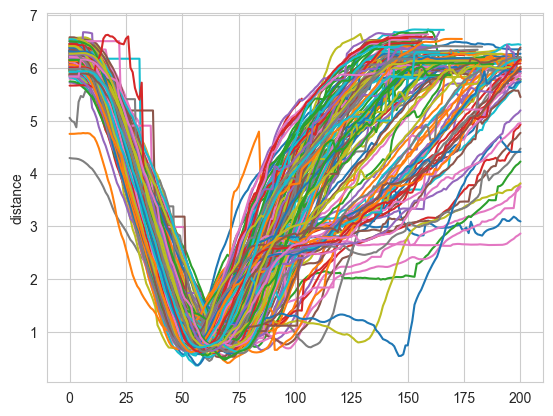

In [39]:
df_dis_dom = get_df_distance(pp_ids= ["%02d" % x for x in range(1, 22)], apparance = 'dom')
df_dis_dom["Appearance"] = "Dominant"

D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

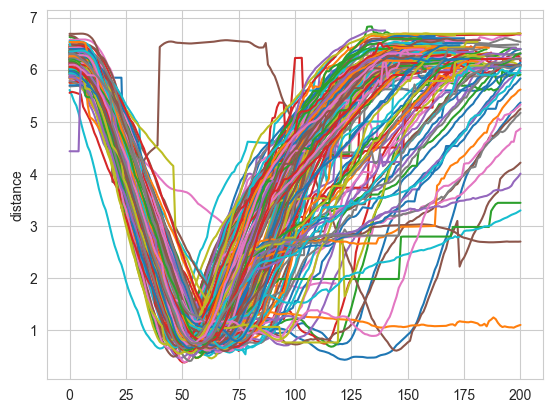

In [40]:
df_dis_sub = get_df_distance(pp_ids= ["%02d" % x for x in range(1, 22)], apparance = 'sub')
df_dis_sub["Appearance"] = "Submissive"

# Some further processing of the distance dynamics data

Put all the distance data generated above to a single dataframe for easier plotting

In [84]:
distance_dynamics = pd.concat([df_dis_sub, df_dis_dom])

Now let's smooth the data to get nicer trajectories and more reliable minimum distances

In [85]:
apply_filter = lambda traj: savgol_filter(traj, window_length=21, polyorder=2, axis=0)
groupby_cols = ["pp_id", "trial"]
cols_to_smooth = ["distance"]
distance_dynamics.loc[:, "distance_s"] = (distance_dynamics.loc[:, groupby_cols + cols_to_smooth].groupby(groupby_cols).transform(apply_filter))

In [86]:
distance_dynamics

,time,distance,trial,pp_id,Appearance,distance_s
0,0.0,6.344672,2,1,Submissive,6.349832
1,0.1,6.320642,2,1,Submissive,6.326750
2,0.2,6.283391,2,1,Submissive,6.296800
3,0.3,6.248953,2,1,Submissive,6.259983
4,0.4,6.213757,2,1,Submissive,6.216298
...,...,...,...,...,...,...
160,16.0,6.295075,15,21,Dominant,6.290577
161,16.1,6.295075,15,21,Dominant,6.309453
162,16.2,6.295075,15,21,Dominant,6.326280
163,16.3,6.295075,15,21,Dominant,6.341059


In [94]:
traj = distance_dynamics[(distance_dynamics.pp_id==1) & (distance_dynamics.trial==2)]

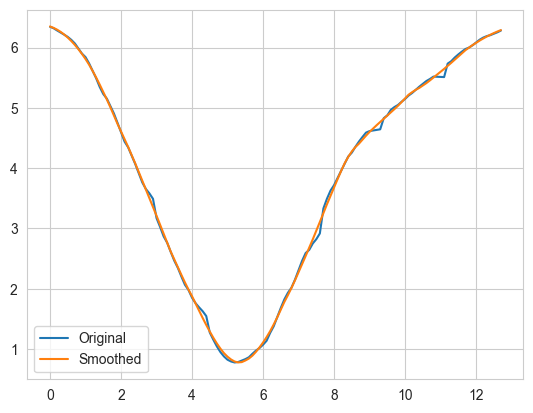

In [97]:
plt.plot(traj.time, traj.distance, label="Original")
plt.plot(traj.time, traj.distance_s, label="Smoothed")
plt.legend()

# Difference in distances to the robot between dominant and submissive robot

D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='time', ylabel='distance_s'>

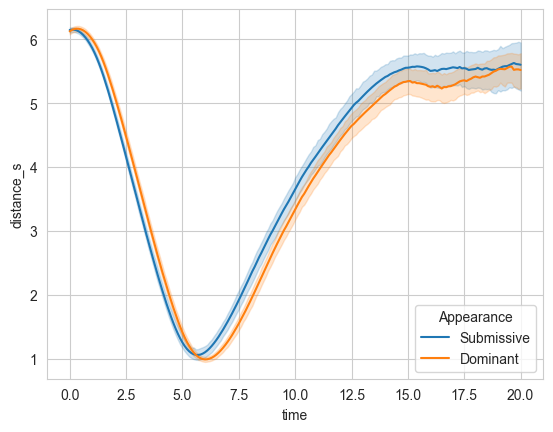

In [88]:
sns.lineplot(data = distance_dynamics, x='time', y='distance_s', hue="Appearance")

Just in case, compare to the original trajectories

D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='time', ylabel='distance'>

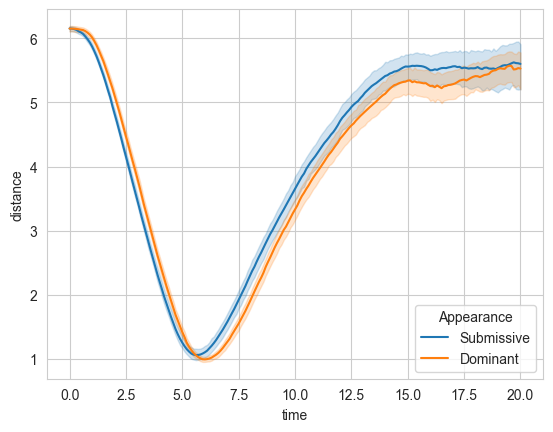

In [87]:
sns.lineplot(data = distance_dynamics, x='time', y='distance', hue="Appearance")

# Differences in trials over time

### For both appearances

D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

<Axes: xlabel='time', ylabel='distance_s'>

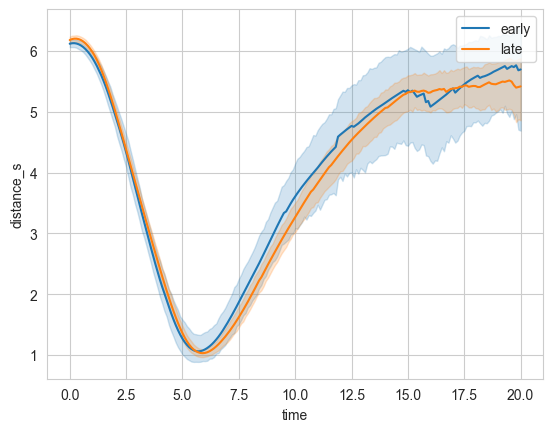

In [89]:
sns.lineplot(data=distance_dynamics[(distance_dynamics.trial.isin([1, 17]))], 
             x="time", y="distance_s", label="early")
sns.lineplot(data=distance_dynamics[(distance_dynamics.trial.isin([13, 14, 15, 16, 29, 30, 31, 32]))], 
             x="time", y="distance_s", label="late")

### For submissive

D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

<Axes: xlabel='time', ylabel='distance_s'>

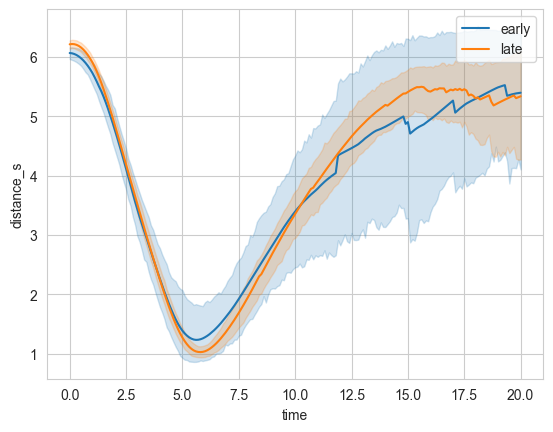

In [90]:
sns.lineplot(data=distance_dynamics[(distance_dynamics.trial.isin([1, 17])) & (distance_dynamics["Appearance"]=="Submissive")], 
             x="time", y="distance_s", label="early")
sns.lineplot(data=distance_dynamics[(distance_dynamics.trial.isin([13, 14, 15, 16, 29, 30, 31, 32]))& (distance_dynamics["Appearance"]=="Submissive")], 
             x="time", y="distance_s", label="late")

### For dominant

D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befo

<Axes: xlabel='time', ylabel='distance_s'>

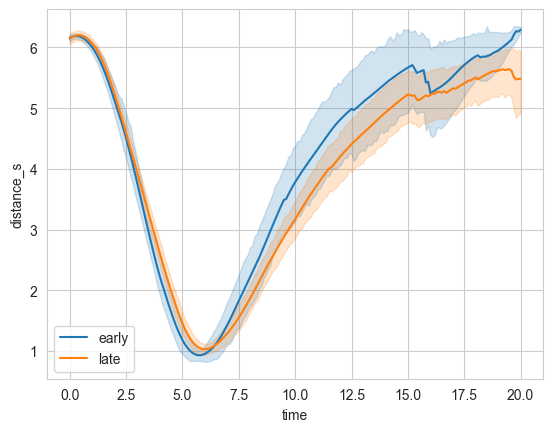

In [91]:
sns.lineplot(data=distance_dynamics[(distance_dynamics.trial.isin([1, 17])) & (distance_dynamics["Appearance"]=="Dominant")], 
             x="time", y="distance_s", label="early")
sns.lineplot(data=distance_dynamics[(distance_dynamics.trial.isin([13, 14, 15, 16, 29, 30, 31, 32]))& (distance_dynamics["Appearance"]=="Dominant")], 
             x="time", y="distance_s", label="late")

# Getting metrics for each trajectory

In [104]:
def get_min_distance(traj):
    idx_min = traj.distance_s.idxmin()
    return pd.Series({"idx_min": idx_min,
                      "t_min": traj.iloc[idx_min].time, 
                      "d_min": traj.iloc[idx_min].distance_s}) 

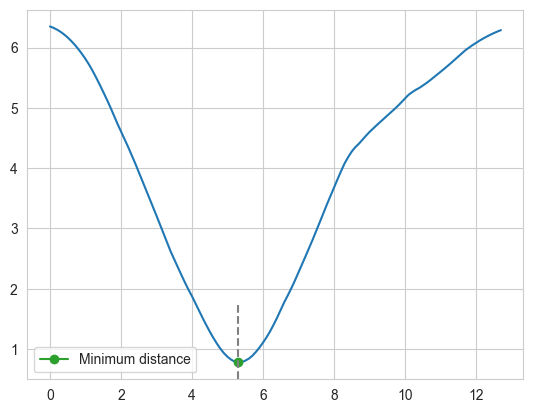

In [161]:
traj = distance_dynamics[(distance_dynamics.pp_id==1) & (distance_dynamics.trial==2)]
fig, ax = plt.subplots(1)
ax.plot(traj.time, traj.distance_s)
traj_measures = get_min_distance(traj)
ax.plot(traj_measures.t_min, traj_measures.d_min, label="Minimum distance", color="C2", marker="o")
ax.axvline(traj_measures.t_min, ymin=0, ymax=0.2, color="grey", ls="--")
plt.legend()

In [130]:
distance_metrics = (distance_dynamics.groupby(["pp_id", "trial"])
                    .apply(get_min_distance)
                    .join(distance_dynamics.groupby(["pp_id", "trial"]).first()["Appearance"])
                    .reset_index())

In [131]:
distance_metrics

,pp_id,trial,idx_min,t_min,d_min,Appearance
0,1,1,51.0,5.1,0.608186,Dominant
1,1,2,53.0,5.3,0.778055,Submissive
2,1,3,53.0,5.3,0.704137,Submissive
3,1,4,61.0,6.1,0.930015,Dominant
4,1,5,57.0,5.7,0.745893,Submissive
...,...,...,...,...,...,...
322,21,12,60.0,6.0,0.631903,Dominant
323,21,13,56.0,5.6,0.769273,Submissive
324,21,14,62.0,6.2,0.710637,Dominant
325,21,15,59.0,5.9,0.699368,Dominant


# Analyzing distance metrics

## Time of resolving the conflict

Let's look at the average time of resolving the conflict (e.g. time at which distance between the human and the spot was minimal)

In [146]:
distance_metrics[distance_metrics.Appearance=="Dominant"].t_min.mean(), distance_metrics[distance_metrics.Appearance=="Submissive"].t_min.mean()

(6.490566037735849, 6.255952380952381)

It seems that in interactions with the submissive robot, participants were slightly faster reaching it (difference of 230ms)

D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='Appearance', ylabel='t_min'>

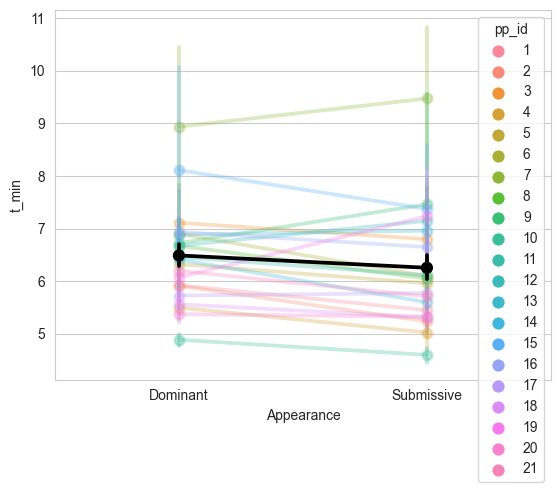

In [140]:
ax = sns.pointplot(data=distance_metrics, x="Appearance", y="t_min", hue="pp_id")
plt.setp(ax.collections, alpha=.3, zorder=1) #for the markers
plt.setp(ax.lines, alpha=.3, zorder=1)
sns.pointplot(data=distance_metrics, x="Appearance", y="t_min", color="black", ax=ax)

But what if we take into account the individual differences in baseline t_min/speed?
 - Mixed-effects model estimates the difference to be smaller (184ms difference between dominant and submissive)
  - It is not statistically significant (p=0.14)

In [141]:
mdf_t = smf.mixedlm("t_min ~ Appearance", distance_metrics.reset_index(), groups=distance_metrics.reset_index()["pp_id"]).fit()
print(mdf_t.summary())

               Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     t_min    
No. Observations:     327         Method:                 REML     
No. Groups:           21          Scale:                  1.2560   
Min. group size:      9           Log-Likelihood:         -528.1515
Max. group size:      16          Converged:              Yes      
Mean group size:      15.6                                         
-------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                 6.439    0.225 28.596 0.000  5.998  6.881
Appearance[T.Submissive] -0.184    0.125 -1.469 0.142 -0.428  0.061
Group Var                 0.894    0.285                           


## Safety margin

The safety margins adopted by participants appear very similar (73-74cm)

In [147]:
distance_metrics[distance_metrics.Appearance=="Dominant"].d_min.mean(), distance_metrics[distance_metrics.Appearance=="Submissive"].d_min.mean()

(0.7406215327107739, 0.7346270749264817)

D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

<Axes: xlabel='Appearance', ylabel='d_min'>

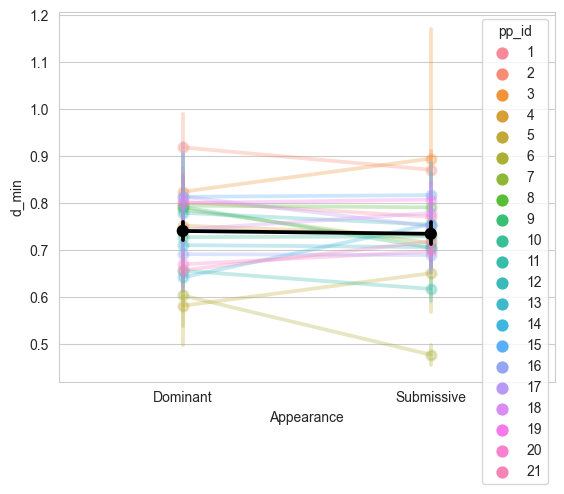

In [148]:
ax = sns.pointplot(data=distance_metrics, x="Appearance", y="d_min", hue="pp_id")
plt.setp(ax.collections, alpha=.3, zorder=1) #for the markers
plt.setp(ax.lines, alpha=.3, zorder=1)
sns.pointplot(data=distance_metrics, x="Appearance", y="d_min", color="black", ax=ax)

Here too, there is no evidence for a significant difference between dominant and submissive Spot

In [129]:
mdf_d = smf.mixedlm("d_min ~ Appearance", distance_metrics.reset_index(), groups=distance_metrics.reset_index()["pp_id"]).fit()
print(mdf_d.summary())

               Mixed Linear Model Regression Results
Model:                 MixedLM     Dependent Variable:     d_min   
No. Observations:      327         Method:                 REML    
No. Groups:            21          Scale:                  0.0114  
Min. group size:       9           Log-Likelihood:         238.4162
Max. group size:       16          Converged:              Yes     
Mean group size:       15.6                                        
-------------------------------------------------------------------
                         Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------
Intercept                 0.741    0.019 39.176 0.000  0.704  0.778
Appearance[T.Submissive] -0.006    0.012 -0.502 0.615 -0.029  0.017
Group Var                 0.006    0.020                           


D:\source\Spot-DataAnalysis\venv\lib\site-packages\statsmodels\regression\mixed_linear_model.py:2238: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


# Trajectories
### Note: Coordinate of participants 11~13 is not aligned to the axis :( I am still figuring out why. 

In [16]:
def get_trajectory_df(pp_ids, apparance, position_of, scenario):
    
    df_plot= None
    
    #Iterate over participants
    for pp_id in pp_ids:
        path = './traj_data/id_' + pp_id + '/' + position_of
       # path_Spot = './traj_data/id_' + pp_id + '/Spot'

        trials = get_trial_list(scenario, apparance)
        
        # Add each trial to one dataframe
        for i in trials[int(pp_id)-1]:
            df = pd.read_csv(path + "/" + pp_id + "_"+ str(i) + ".csv")
            
            # Add some columns that can be useful later 
            df['trial'] = str(i)
            df['pp_id'] = pp_id
            # print(df['z'])
            df['z'] = df['z'] - df.loc[0]['z'] # To adjust noise in the start 
            
            df_plot = pd.concat([df_plot, df.loc[:200]], axis = 0)
            
    return df_plot

D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='x', ylabel='z'>

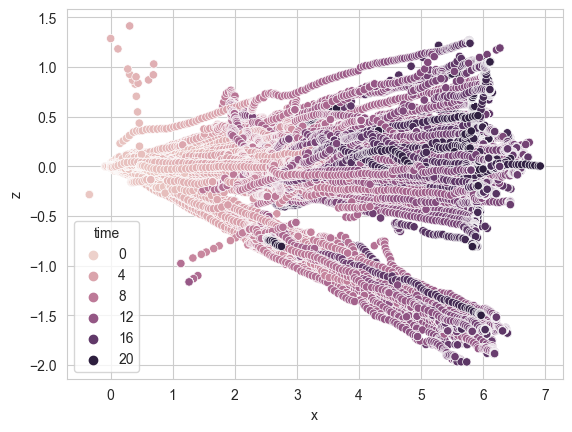

In [17]:
## First, plot all the trajectory points for Spot (dominant)

df_traj_Spot = get_trajectory_df(pp_ids = ["%02d" % x for x in range(1, 22)], apparance = 'dom', position_of = 'Spot', scenario = 'fronting');
sns.scatterplot(data = df_traj_Spot.loc[: , ['x', 'z', 'time']], x = 'x', y = 'z', hue = 'time')

D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\source\Spot-DataAnalysis\venv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='x', ylabel='z'>

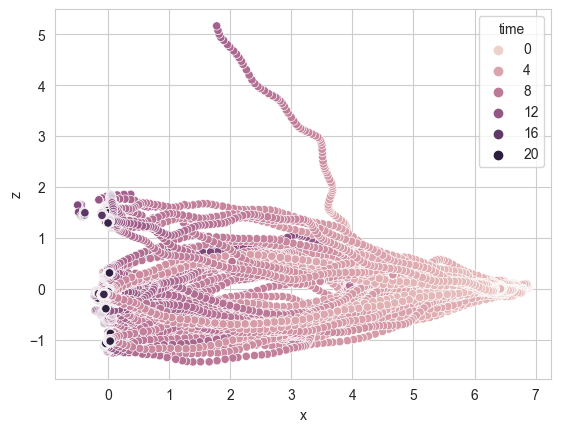

In [18]:
# Human, dominant
df_traj_Human = get_trajectory_df(pp_ids =  ["%02d" % x for x in range(1, 12)], apparance = 'dom', position_of = 'Human', scenario = 'fronting');
sns.scatterplot(data = df_traj_Human.loc[: , ['x', 'z', 'time']], x = 'x', y = 'z', hue = 'time' )

In [ ]:
#sns.lineplot(data = df_traj_Human.loc[:, ['x', 'z','time']], x = 'x', y = 'z')
# Line plot is ugly here

In [19]:
# Next idea
# Groupby participants -> draw 21 trajectories??
# (This part is not done.)

df_traj_Spot_pp = df_traj_Spot.groupby(['pp_id']).mean()
sns.scatterplot(data = df_traj_Spot.loc[: , ['x', 'z', 'time']], x = 'x', y = 'z', hue = 'time')

TypeError: agg function failed [how->mean,dtype->object]